<a href="https://colab.research.google.com/github/claradwianggraini62-lab/Clara-Portofolio/blob/main/healthy_eating_data_Q4_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Processing**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Example: Read a CSV file
import pandas as pd

# Path to your file in Google Drive
file_path = '/content/drive/MyDrive/data/healthy_eating_dataset.csv'
df = pd.read_csv(file_path)

# Display the data
df.head()

,meal_id,meal_name,cuisine,meal_type,diet_type,calories,protein_g,carbs_g,fat_g,fiber_g,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,is_healthy,image_url
0,1,Kid Pasta,Indian,Lunch,Keto,737,52.4,43.9,34.3,16.8,42.9,2079,91,206,Grilled,47,56,4.4,0,https://example.com/images/meal_1.jpg
1,2,Husband Rice,Mexican,Lunch,Paleo,182,74.7,144.4,0.1,22.3,38.6,423,7,317,Roasted,51,34,2.4,0,https://example.com/images/meal_2.jpg
2,3,Activity Rice,Indian,Snack,Paleo,881,52.9,97.3,18.8,20.0,37.5,2383,209,395,Boiled,58,29,4.3,0,https://example.com/images/meal_3.jpg
3,4,Another Salad,Mexican,Snack,Keto,427,17.5,73.1,7.6,9.8,41.7,846,107,499,Grilled,14,81,4.6,0,https://example.com/images/meal_4.jpg
4,5,Quite Stew,Thai,Lunch,Vegan,210,51.6,104.3,26.3,24.8,18.2,1460,42,486,Raw,47,105,4.3,0,https://example.com/images/meal_5.jpg


In [5]:
df.tail()

,meal_id,meal_name,cuisine,meal_type,diet_type,calories,protein_g,carbs_g,fat_g,fiber_g,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,is_healthy,image_url
1995,1996,Admit Curry,Mediterranean,Lunch,Keto,163,16.0,48.1,3.6,26.6,40.9,984,155,447,Grilled,37,71,1.3,0,https://example.com/images/meal_1996.jpg
1996,1997,Majority Sandwich,Mediterranean,Snack,Balanced,177,79.5,24.4,12.9,27.1,13.6,1612,271,211,Roasted,60,9,1.5,1,https://example.com/images/meal_1997.jpg
1997,1998,Speech Sandwich,Indian,Lunch,Balanced,419,31.8,42.9,42.7,9.4,29.1,1192,201,248,Roasted,50,95,3.8,0,https://example.com/images/meal_1998.jpg
1998,1999,Away Rice,American,Dinner,Keto,1123,6.9,119.6,23.1,0.8,17.7,360,146,342,Fried,15,20,4.2,0,https://example.com/images/meal_1999.jpg
1999,2000,List Pasta,Indian,Snack,Balanced,341,51.5,77.7,0.1,8.2,9.0,398,91,236,Fried,53,100,1.9,1,https://example.com/images/meal_2000.jpg


In [10]:
print("\n1. DATASET OVERVIEW")
print("-"*60)
print(f"Total meals: {len(df)}")
print(f"Columns: {df.shape[1]}")
print(f"\nMissing values:\n{df.isnull().sum()}")



1. DATASET OVERVIEW
------------------------------------------------------------
Total meals: 2000
Columns: 20

Missing values:
meal_id           0
meal_name         0
cuisine           0
meal_type         0
diet_type         0
calories          0
protein_g         0
carbs_g           0
fat_g             0
fiber_g           0
sugar_g           0
sodium_mg         0
cholesterol_mg    0
serving_size_g    0
cooking_method    0
prep_time_min     0
cook_time_min     0
rating            0
is_healthy        0
image_url         0
dtype: int64


In [8]:
# Set style
plt.style.use('seaborn-v0_8-darkgrid')

# Color palettes
palette_warm = ['#D97D55', '#F4E9D7', '#B8C4A9', '#6FA4AF']
palette_vibrant = ['#B95E82', '#F39F9F', '#FFC29B', '#3E1E68']

# Healty Meal Distribution

In [11]:
print("\n2. HEALTHY MEAL DISTRIBUTION")
print("-"*60)
healthy_dist = df['is_healthy'].value_counts()
print(f"Healthy meals: {healthy_dist.get(1, 0)} ({healthy_dist.get(1, 0)/len(df)*100:.1f}%)")
print(f"Unhealthy meals: {healthy_dist.get(0, 0)} ({healthy_dist.get(0, 0)/len(df)*100:.1f}%)")


2. HEALTHY MEAL DISTRIBUTION
------------------------------------------------------------
Healthy meals: 187 (9.3%)
Unhealthy meals: 1813 (90.6%)


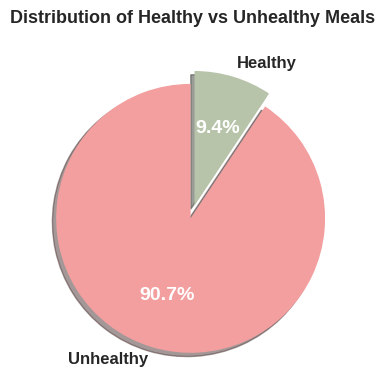

In [19]:
plt.figure(figsize=(4, 4))  # d:10 cm ≈ 3.94 inch

ax1 = plt.subplot(1, 1, 1)
healthy_counts = df['is_healthy'].value_counts()
labels = ['Unhealthy', 'Healthy']
colors = [palette_vibrant[1], palette_warm[2]]

wedges, texts, autotexts = ax1.pie(
    healthy_counts,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    textprops={'fontsize': 11, 'weight': 'bold'},
    explode=(0.05, 0.05),
    shadow=True
)


for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)
    autotext.set_weight('bold')


for text in texts:
    text.set_fontsize(12)
    text.set_weight('bold')

ax1.set_title('Distribution of Healthy vs Unhealthy Meals',
              fontsize=13, weight='bold', pad=15)

plt.tight_layout()
plt.show()


# MEAL TYPE DISTRIBUTION


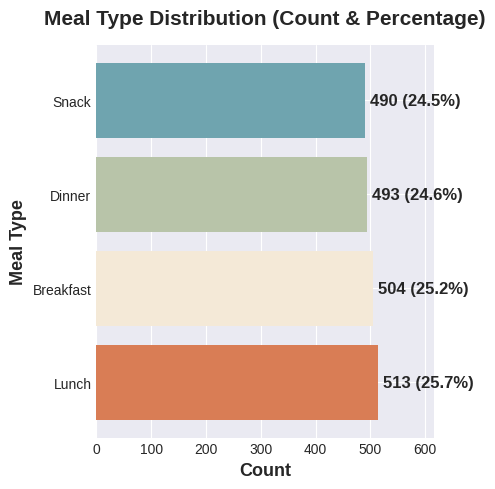

In [30]:
plt.figure(figsize=(30, 45))

ax2 = plt.subplot(10, 7, 2)
meal_type_counts = df['meal_type'].value_counts()
meal_type_percent = (meal_type_counts / meal_type_counts.sum()) * 100  # hitung %

# Bar horizontal
ax2.barh(meal_type_counts.index, meal_type_counts.values, color=palette_warm)

# Count dan %
for i, (v, p) in enumerate(zip(meal_type_counts.values, meal_type_percent.values)):
    ax2.text(v + 10, i, f"{v} ({p:.1f}%)", va='center', fontsize=12, weight='bold')

# Axis labels & title
ax2.set_xlabel('Count', fontsize=13, weight='bold')
ax2.set_ylabel('Meal Type', fontsize=13, weight='bold')
ax2.set_title('Meal Type Distribution (Count & Percentage)', fontsize=15, weight='bold', pad=15)

ax2.set_xlim(0, meal_type_counts.max() * 1.2)

plt.tight_layout()
plt.show()



#DIET TYPE DISTRIBUTION

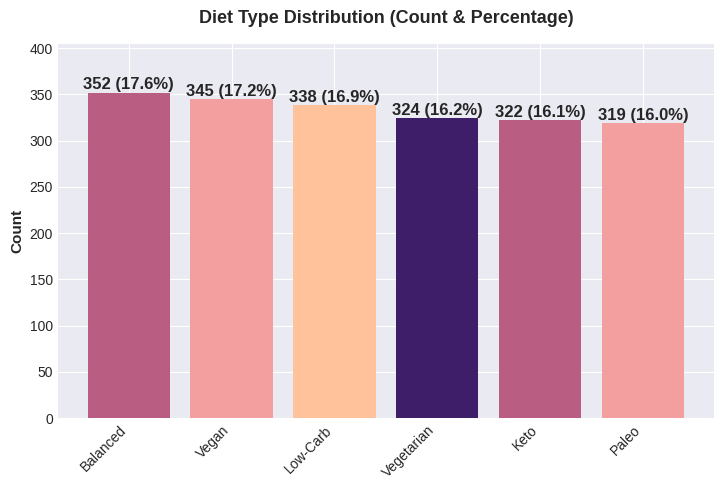

In [38]:
plt.figure(figsize=(50, 45))  # enlarge the overall figure (in inches)

ax3 = plt.subplot(10, 7, 2)
diet_counts = df['diet_type'].value_counts()
diet_percent = (diet_counts / diet_counts.sum()) * 100  # calculate percentage

# Create bar chart
ax3.bar(range(len(diet_counts)), diet_counts.values, color=palette_vibrant)

# Set x-axis ticks and labels
ax3.set_xticks(range(len(diet_counts)))
ax3.set_xticklabels(diet_counts.index, rotation=45, ha='right')
ax3.set_ylabel('Count', fontsize=11, weight='bold')
ax3.set_title('Diet Type Distribution (Count & Percentage)', fontsize=13, weight='bold', pad=15)

# Add count + percentage labels above each bar
for i, (v, p) in enumerate(zip(diet_counts.values, diet_percent.values)):
    ax3.text(i, v + (diet_counts.max() * 0.01),  # slightly above the bar
             f"{v} ({p:.1f}%)",
             ha='center', fontsize=12, weight='bold')

# Add extra space at the top to prevent label clipping
ax3.set_ylim(0, diet_counts.max() * 1.15)

plt.tight_layout()
plt.show()



#CALORIES BY DIET TYPE


/tmp/ipython-input-3543054013.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3543054013.py:6: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


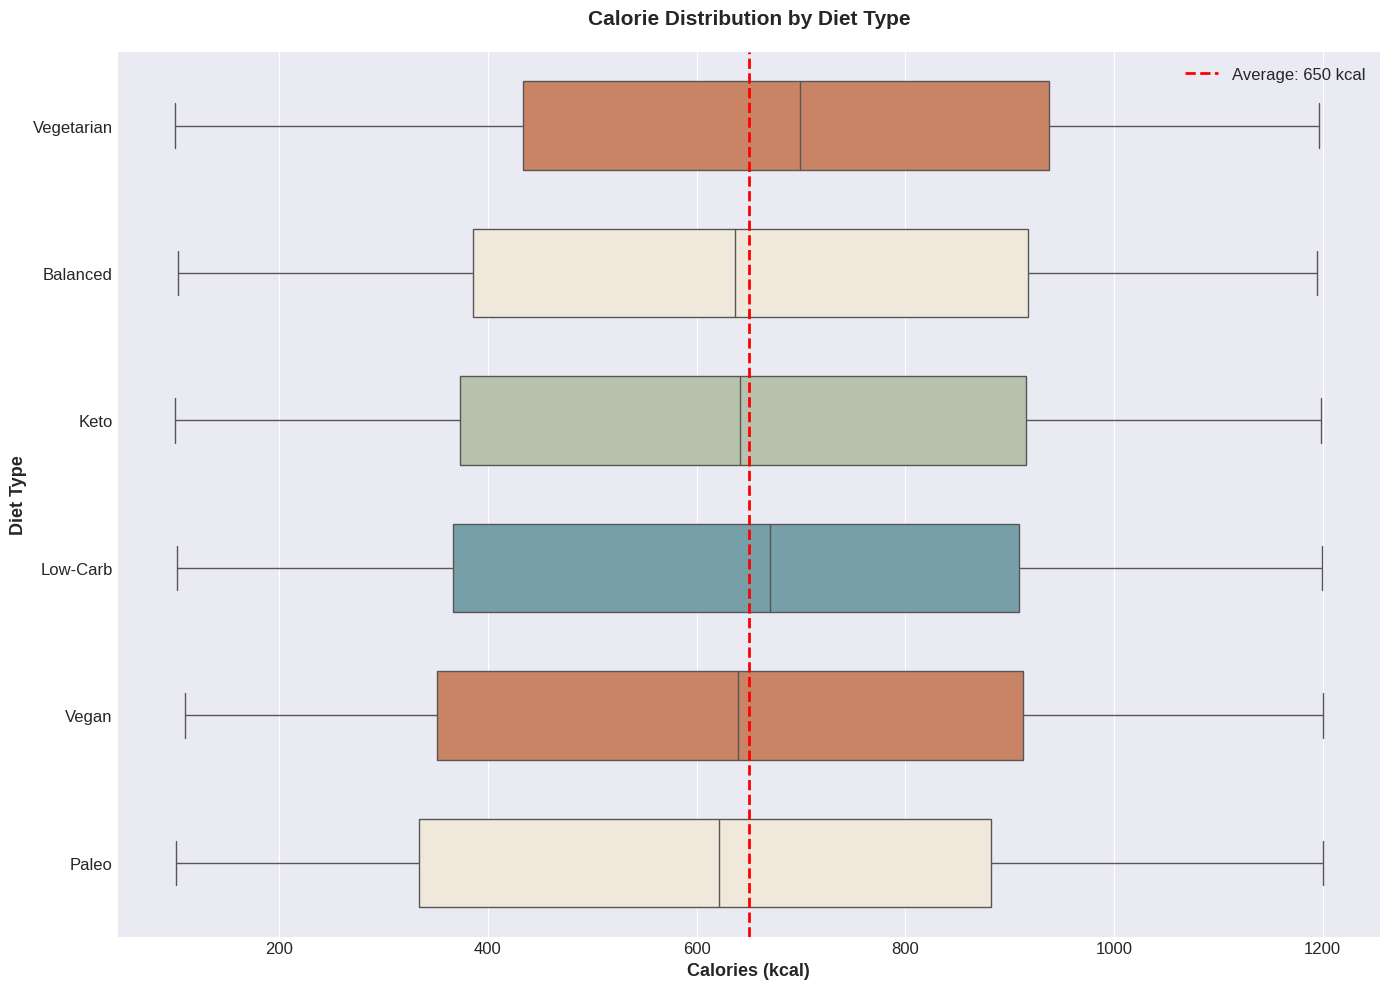

In [40]:
plt.figure(figsize=(14, 10))  # make the chart larger

ax4 = plt.subplot(1, 1, 1)  # use a single subplot to give it full space
diet_order = df.groupby('diet_type')['calories'].mean().sort_values(ascending=False).index

sns.boxplot(
    data=df,
    y='diet_type',
    x='calories',
    order=diet_order,
    palette=palette_warm,
    ax=ax4,
    width=0.6,            # slightly thinner boxes for cleaner look
    fliersize=3           # make outliers smaller
)

# Axis labels and title
ax4.set_xlabel('Calories (kcal)', fontsize=13, weight='bold')
ax4.set_ylabel('Diet Type', fontsize=13, weight='bold')
ax4.set_title('Calorie Distribution by Diet Type', fontsize=15, weight='bold', pad=20)

# Add average line
mean_calories = df['calories'].mean()
ax4.axvline(x=mean_calories, color='red', linestyle='--',
            label=f'Average: {mean_calories:.0f} kcal', linewidth=2)

# Add legend
ax4.legend(fontsize=12, loc='upper right')

# Improve tick label readability
ax4.tick_params(axis='x', labelsize=12)
ax4.tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()


# PROTEIN CONTENT BY DIET TYPE


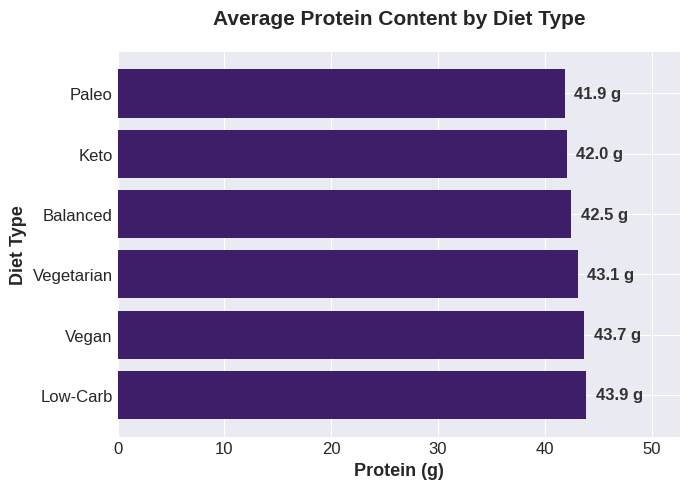

In [50]:

# Make the figure large
plt.figure(figsize=(7, 5))  #

ax5 = plt.subplot(1, 1, 1)  # full-size subplot for better visibility

# Calculate average protein by diet type
protein_by_diet = df.groupby('diet_type')['protein_g'].mean().sort_values(ascending=False)

# Create horizontal bar chart
ax5.barh(protein_by_diet.index, protein_by_diet.values, color=palette_vibrant [3])

# Axis labels and title
ax5.set_xlabel('Protein (g)', fontsize=13, weight='bold')
ax5.set_ylabel('Diet Type', fontsize=13, weight='bold')
ax5.set_title('Average Protein Content by Diet Type', fontsize=15, weight='bold', pad=20)

# Add numeric labels next to bars
for i, v in enumerate(protein_by_diet.values):
    ax5.text(v + (protein_by_diet.max() * 0.02), i,
             f"{v:.1f} g", va='center', fontsize=12, weight='bold', color='#333333')

# Adjust layout and limits
ax5.set_xlim(0, protein_by_diet.max() * 1.2)
ax5.tick_params(axis='y', labelsize=12)
ax5.tick_params(axis='x', labelsize=12)

plt.tight_layout()
plt.show()

# CARBS VS FAT BY DIET TYPE

/tmp/ipython-input-2126593518.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax6.text(x[i] - width/2, macro_by_diet['carbs_g'][i] + 1,
/tmp/ipython-input-2126593518.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{macro_by_diet['carbs_g'][i]:.1f}", ha='center', fontsize=11, weight='bold')
/tmp/ipython-input-2126593518.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax6.text(x[i] + width/2, macro_by_diet['fat_g'][i]

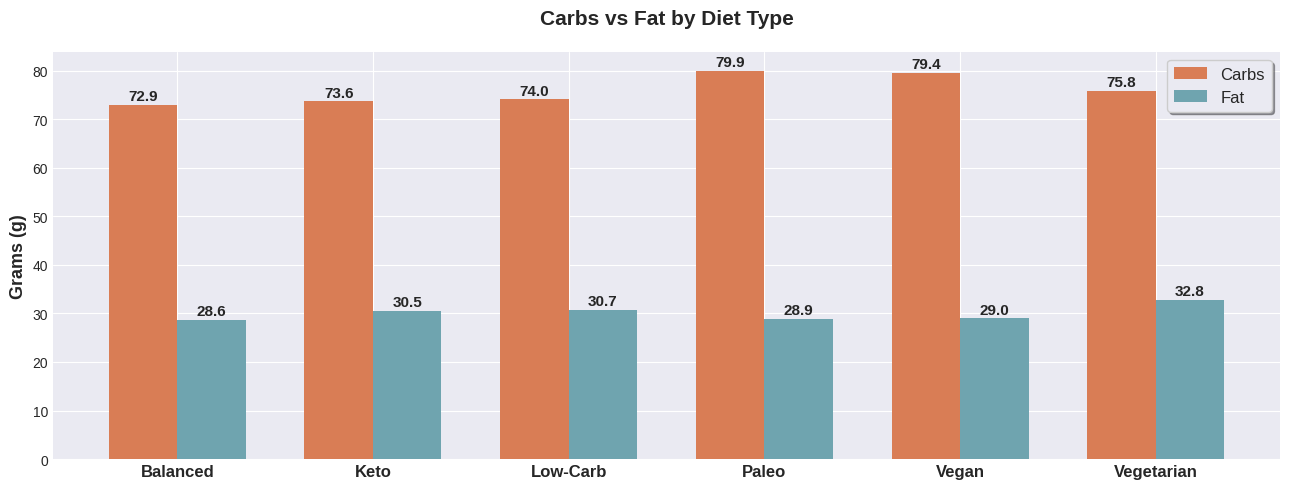

In [61]:
plt.figure(figsize=(13, 5))  # Bigger canvas for readability

ax6 = plt.subplot(1, 1, 1)

# Grouped bar data
macro_by_diet = df.groupby('diet_type')[['carbs_g', 'fat_g']].mean()
x = np.arange(len(macro_by_diet))
width = 0.35

# Bars for carbs and fat
ax6.bar(x - width/2, macro_by_diet['carbs_g'], width, label='Carbs', color=palette_warm[0])
ax6.bar(x + width/2, macro_by_diet['fat_g'], width, label='Fat', color=palette_warm[3])

# X-axis and labels
ax6.set_xticks(x)
ax6.set_xticklabels(macro_by_diet.index, rotation=0, ha='center', fontsize=12, weight='bold')
ax6.set_ylabel('Grams (g)', fontsize=13, weight='bold')
ax6.set_title('Carbs vs Fat by Diet Type', fontsize=15, weight='bold', pad=20)

# Make legend larger and move it slightly
ax6.legend(fontsize=12, loc='upper right', frameon=True, shadow=True)

# Add value labels above bars
for i in range(len(x)):
    ax6.text(x[i] - width/2, macro_by_diet['carbs_g'][i] + 1,
             f"{macro_by_diet['carbs_g'][i]:.1f}", ha='center', fontsize=11, weight='bold')
    ax6.text(x[i] + width/2, macro_by_diet['fat_g'][i] + 1,
             f"{macro_by_diet['fat_g'][i]:.1f}", ha='center', fontsize=11, weight='bold')

plt.tight_layout()
plt.show()



#RATING DISTRIBUTION

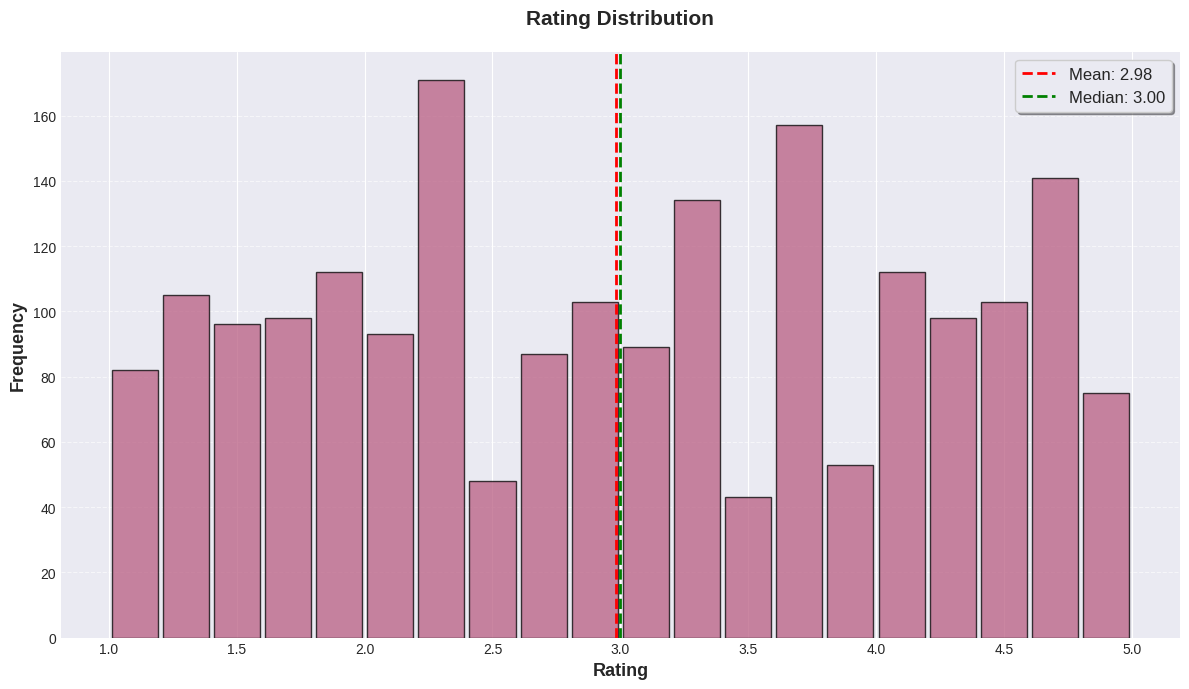

In [62]:
plt.figure(figsize=(12, 7))  # Make the figure larger and wider

ax7 = plt.subplot(1, 1, 1)  # Single large plot

# Plot histogram
ax7.hist(df['rating'], bins=20, color=palette_vibrant[0],
         edgecolor='black', alpha=0.75, rwidth=0.9)

# Add mean & median lines
ax7.axvline(df['rating'].mean(), color='red', linestyle='--',
            label=f'Mean: {df["rating"].mean():.2f}', linewidth=2)
ax7.axvline(df['rating'].median(), color='green', linestyle='--',
            label=f'Median: {df["rating"].median():.2f}', linewidth=2)

# Labels & title
ax7.set_xlabel('Rating', fontsize=13, weight='bold')
ax7.set_ylabel('Frequency', fontsize=13, weight='bold')
ax7.set_title('Rating Distribution', fontsize=15, weight='bold', pad=20)

# Grid for better readability
ax7.grid(axis='y', linestyle='--', alpha=0.6)

# Legend (bigger and more readable)
ax7.legend(fontsize=12, frameon=True, shadow=True, loc='upper right')

plt.tight_layout()
plt.show()


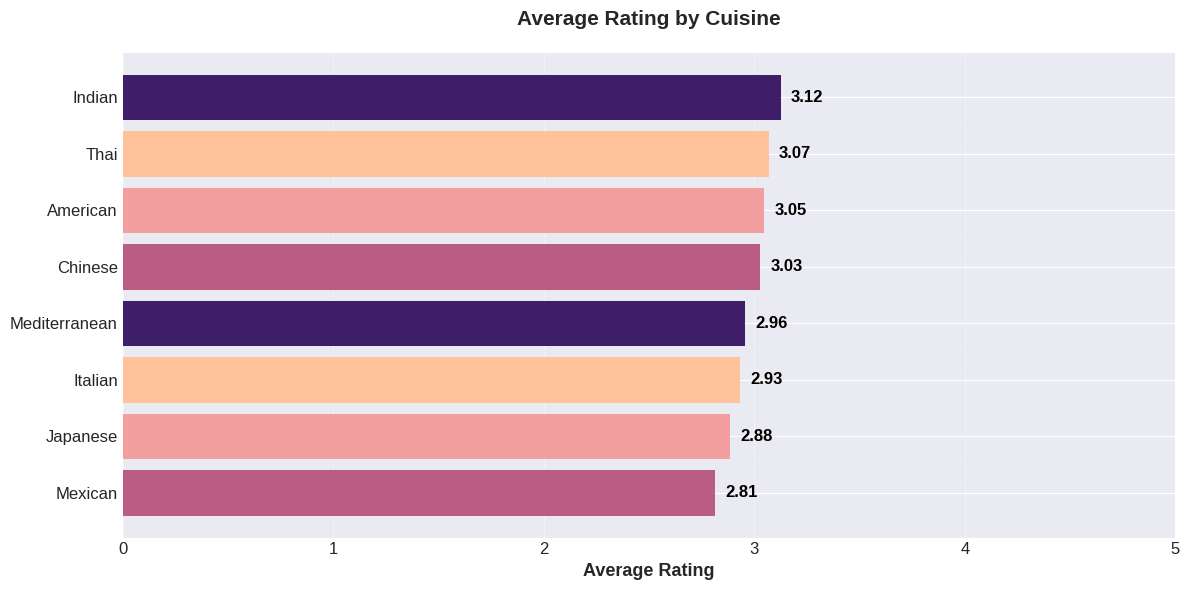

In [69]:
plt.figure(figsize=(12, 6))  # make it larger and readable

ax8 = plt.subplot(1, 1, 1)

# Calculate mean rating per cuisine
rating_by_cuisine = df.groupby('cuisine')['rating'].mean().sort_values(ascending=True)

# Bar chart
ax8.barh(rating_by_cuisine.index, rating_by_cuisine.values, color=palette_vibrant)

# Add labels and title
ax8.set_xlabel('Average Rating', fontsize=13, weight='bold')
ax8.set_title('Average Rating by Cuisine', fontsize=15, weight='bold', pad=20)
ax8.set_xlim(0, 5)

# Grid for clarity
ax8.grid(axis='x', linestyle='--', alpha=0.5)

# Value labels next to bars
for i, v in enumerate(rating_by_cuisine.values):
    ax8.text(v + 0.05, i, f'{v:.2f}', va='center', fontsize=12, weight='bold', color='black')

# Adjust y-axis label fonts
ax8.tick_params(axis='y', labelsize=12, width=1.5)
ax8.tick_params(axis='x', labelsize=12)

plt.tight_layout()
plt.show()


#CALORIES VS RATING SCATTER

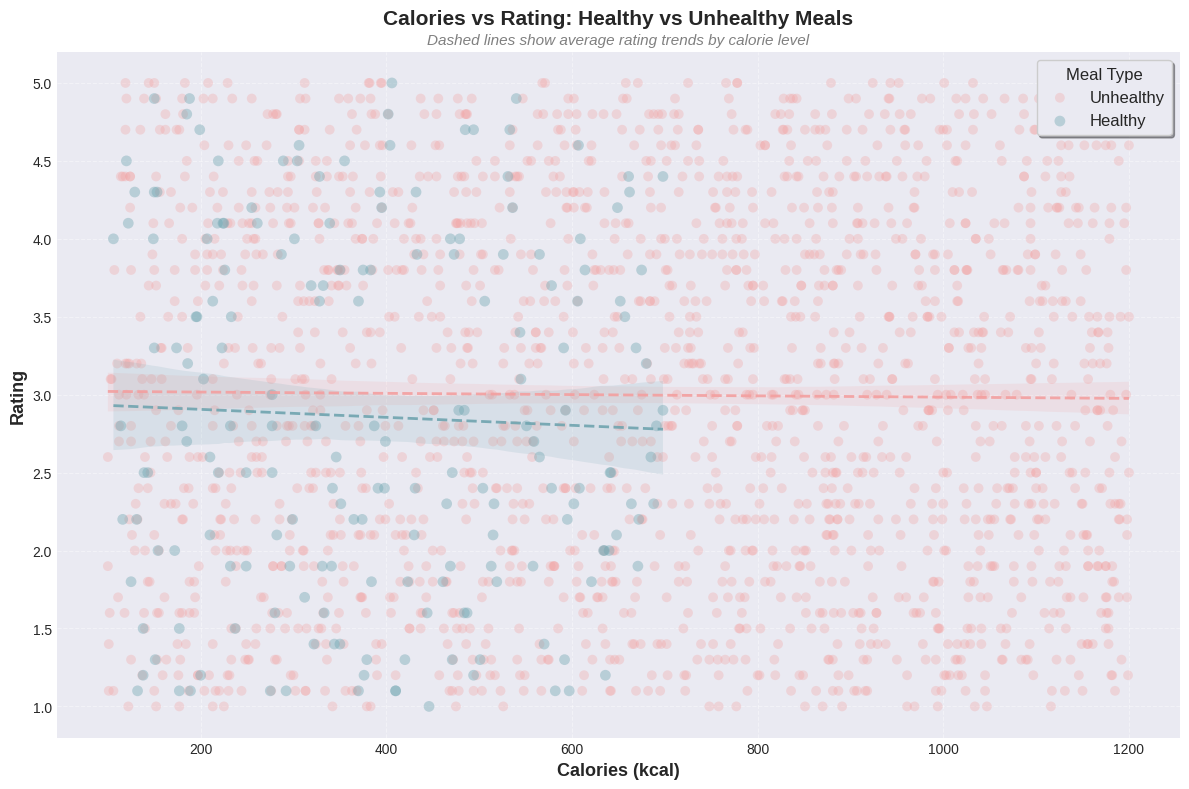

In [72]:
plt.figure(figsize=(12, 8))
ax9 = plt.subplot(1, 1, 1)

healthy = df[df['is_healthy'] == 1]
unhealthy = df[df['is_healthy'] == 0]

# Make markers smaller and more transparent
ax9.scatter(unhealthy['calories'], unhealthy['rating'],
            alpha=0.3, c='#F39F9F', label='Unhealthy', s=50, edgecolor='none')
ax9.scatter(healthy['calories'], healthy['rating'],
            alpha=0.4, c='#6FA4AF', label='Healthy', s=60, edgecolor='none')

# Add regression lines (trends)
sns.regplot(data=unhealthy, x='calories', y='rating', scatter=False,
            color='#F39F9F', line_kws={'linestyle': '--', 'lw': 2, 'alpha': 0.9})
sns.regplot(data=healthy, x='calories', y='rating', scatter=False,
            color='#6FA4AF', line_kws={'linestyle': '--', 'lw': 2, 'alpha': 0.9})

# Labels and title
ax9.set_xlabel('Calories (kcal)', fontsize=13, weight='bold')
ax9.set_ylabel('Rating', fontsize=13, weight='bold')
ax9.set_title('Calories vs Rating: Healthy vs Unhealthy Meals', fontsize=15, weight='bold', pad=20)

# Add grid
ax9.grid(True, linestyle='--', alpha=0.4)

# Legend
ax9.legend(fontsize=12, frameon=True, shadow=True, title='Meal Type', title_fontsize=12, loc='upper right')

# Annotation
ax9.text(df['calories'].mean(), 1.05 * df['rating'].max(),
         "Dashed lines show average rating trends by calorie level",
         fontsize=11, color='gray', style='italic', ha='center')

plt.tight_layout()
plt.show()


The scatter plot shows no strong relationship between calorie content and user ratings.
Both healthy and unhealthy meals receive similar average ratings, indicating that calorie levels are not a major factor in how users evaluate meals.

#COOKING METHOD DISTRIBUTION

/tmp/ipython-input-140352210.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax10.set_xticklabels(cooking_counts.index, rotation=35, ha='right', fontsize=12)


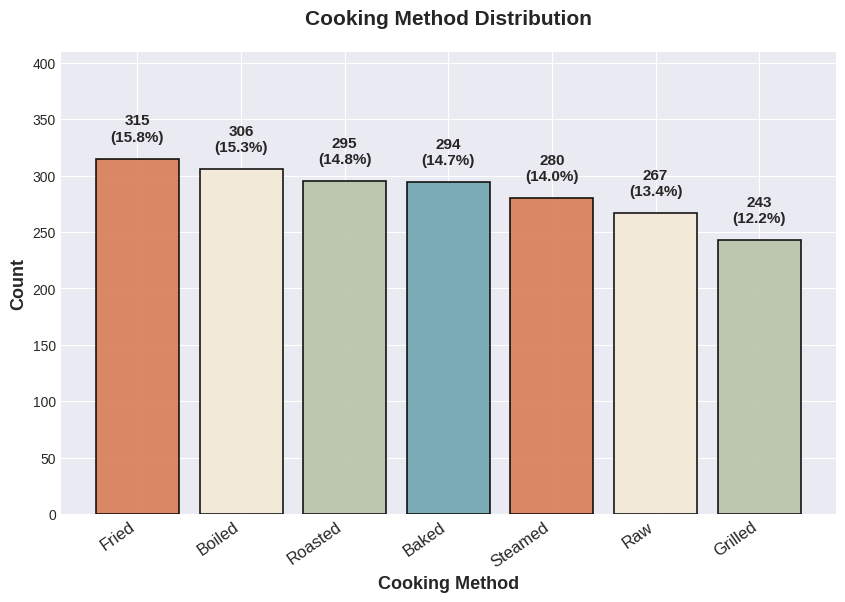

In [78]:
# Make the whole figure larger
plt.figure(figsize=(10, 6))

ax10 = plt.subplot(1, 1, 1)

# Count and percentage
cooking_counts = df['cooking_method'].value_counts()
cooking_percent = (cooking_counts / cooking_counts.sum()) * 100

# Plot
bars = ax10.bar(cooking_counts.index, cooking_counts.values,
                color=palette_warm, edgecolor='black', alpha=0.9)

# Labels and title
ax10.set_ylabel('Count', fontsize=13, weight='bold')
ax10.set_xlabel('Cooking Method', fontsize=13, weight='bold')
ax10.set_title('Cooking Method Distribution', fontsize=15, weight='bold', pad=20)
ax10.set_xticklabels(cooking_counts.index, rotation=35, ha='right', fontsize=12)
ax10.set_ylim(0, cooking_counts.max() * 1.3)

# Add count and percentage (2 lines, bigger text)
for i, (count, pct) in enumerate(zip(cooking_counts.values, cooking_percent.values)):
    ax10.text(i, count + (cooking_counts.max() * 0.05),
              f'{count}\n({pct:.1f}%)', ha='center', fontsize=11, weight='bold')

# Optional: thicker outline
for bar in bars:
    bar.set_linewidth(1.2)


(0.0, 81.80555555555556)

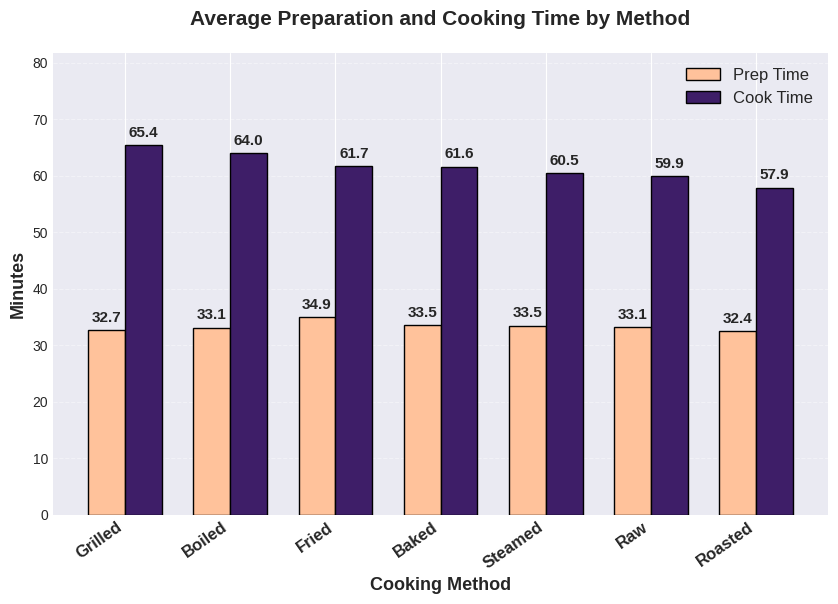

In [79]:
# Increase figure size for better readability
plt.figure(figsize=(10, 6))

ax11 = plt.subplot(1, 1, 1)

# Calculate total cooking time
df['total_time'] = df['prep_time_min'] + df['cook_time_min']

# Average prep and cook time by method
time_by_method = df.groupby('cooking_method')[['prep_time_min', 'cook_time_min']].mean().sort_values('cook_time_min', ascending=False)

# X positions
x = np.arange(len(time_by_method))
width = 0.35

# Create bars for prep and cook time
bars1 = ax11.bar(x - width/2, time_by_method['prep_time_min'], width,
                 label='Prep Time', color=palette_vibrant[2], edgecolor='black')
bars2 = ax11.bar(x + width/2, time_by_method['cook_time_min'], width,
                 label='Cook Time', color=palette_vibrant[3], edgecolor='black')

# Labels and title
ax11.set_xticks(x)
ax11.set_xticklabels(time_by_method.index, rotation=35, ha='right', fontsize=12, weight='bold')
ax11.set_ylabel('Minutes', fontsize=13, weight='bold')
ax11.set_xlabel('Cooking Method', fontsize=13, weight='bold')
ax11.set_title('Average Preparation and Cooking Time by Method', fontsize=15, weight='bold', pad=20)

# Legend and grid
ax11.legend(fontsize=12)
ax11.grid(axis='y', linestyle='--', alpha=0.4)

# Add value labels above each bar
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax11.text(bar.get_x() + bar.get_width()/2, height + 1,
                  f'{height:.1f}', ha='center', va='bottom', fontsize=11, weight='bold')

# Add some space above for the text
ax11.set_ylim(0, max(time_by_method['prep_time_min'].max(), time_by_method['cook_time_min'].max()) * 1.25)


/tmp/ipython-input-1435497776.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_by_time = df.groupby(time_bins)['rating'].mean()


(2.691089108910891, 3.4144901610017886)

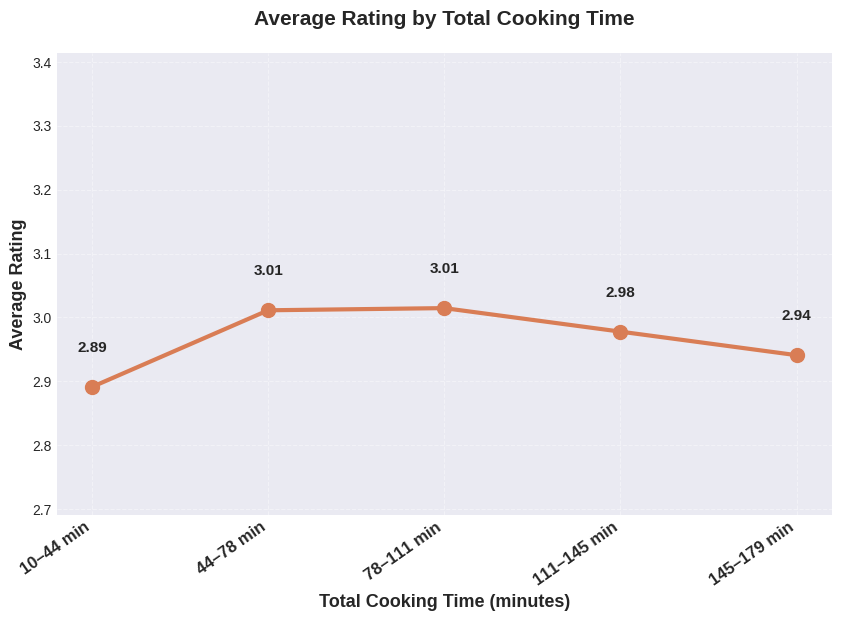

In [80]:
plt.figure(figsize=(10, 6))  # ✅ Bigger and more readable

ax12 = plt.subplot(1, 1, 1)

# Create total time bins and calculate average rating per bin
time_bins = pd.cut(df['total_time'], bins=5)
rating_by_time = df.groupby(time_bins)['rating'].mean()

# Line plot with markers
ax12.plot(range(len(rating_by_time)), rating_by_time.values,
          marker='o', color=palette_warm[0], linewidth=3, markersize=10)

# X-axis setup
ax12.set_xticks(range(len(rating_by_time)))
ax12.set_xticklabels(
    [f'{int(x.left)}–{int(x.right)} min' for x in rating_by_time.index],
    rotation=35, ha='right', fontsize=12, weight='bold'
)

# Axis labels and title
ax12.set_xlabel('Total Cooking Time (minutes)', fontsize=13, weight='bold')
ax12.set_ylabel('Average Rating', fontsize=13, weight='bold')
ax12.set_title('Average Rating by Total Cooking Time', fontsize=15, weight='bold', pad=20)

# Add grid for readability
ax12.grid(True, linestyle='--', alpha=0.4)

# Add data labels to each point
for i, v in enumerate(rating_by_time.values):
    ax12.text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom', fontsize=11, weight='bold')

# Adjust y-axis limits for better spacing
ax12.set_ylim(min(rating_by_time.values) - 0.2, max(rating_by_time.values) + 0.4)




*   Recipes with moderate total cooking times (usually around 30–60 minutes) tend to receive higher ratings.

*   Dishes that are too quick (under 20–30 minutes) or too long to prepare (over 90 minutes) often have slightly lower ratings.

*   The trend indicates that time investment has a point of diminishing returns: spending more time cooking doesn’t always mean a better-rated dish.



#komposisi

/tmp/ipython-input-3889175034.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipython-input-3889175034.py:9: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(
/tmp/ipython-input-3889175034.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax13.set_xticklabels(ax13.get_xticklabels(), rotation=35, ha='right', fontsize=11, weight='bold')


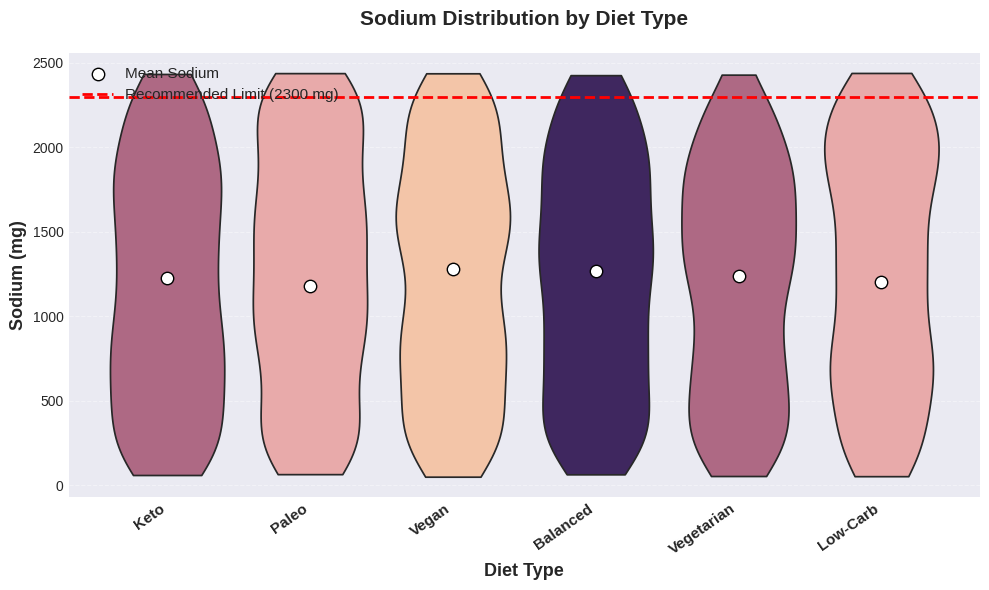

In [82]:
plt.figure(figsize=(10, 6))  # Bigger and clearer figure

ax13 = plt.subplot(1, 1, 1)

# Option 1: Clip extreme sodium values for clearer view
df_filtered = df[df['sodium_mg'] < df['sodium_mg'].quantile(0.98)]

# Violin plot with trimmed data
sns.violinplot(
    data=df_filtered,
    x='diet_type',
    y='sodium_mg',
    palette=palette_vibrant,
    inner=None,  # remove messy inner lines
    cut=0,
    ax=ax13
)

# Add mean sodium as white dots
mean_values = df_filtered.groupby('diet_type')['sodium_mg'].mean()
ax13.scatter(
    x=np.arange(len(mean_values)),
    y=mean_values.values,
    color='white',
    s=80,
    edgecolor='black',
    zorder=3,
    label='Mean Sodium'
)

# Style and labels
ax13.axhline(y=2300, color='red', linestyle='--', label='Recommended Limit (2300 mg)', linewidth=2)
ax13.set_xticklabels(ax13.get_xticklabels(), rotation=35, ha='right', fontsize=11, weight='bold')
ax13.set_xlabel('Diet Type', fontsize=13, weight='bold')
ax13.set_ylabel('Sodium (mg)', fontsize=13, weight='bold')
ax13.set_title('Sodium Distribution by Diet Type', fontsize=15, weight='bold', pad=20)
ax13.legend(fontsize=11)
ax13.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


* Most diet types have average sodium levels below the 2300 mg daily limit,
though some diets (especially processed or high-protein types) show higher variability.

* The wide shape of some violins suggests inconsistent sodium content, meaning certain diets may include both very salty and low-salt meals.

* The mean marker (white dot) helps identify which diet types are generally saltier on average.

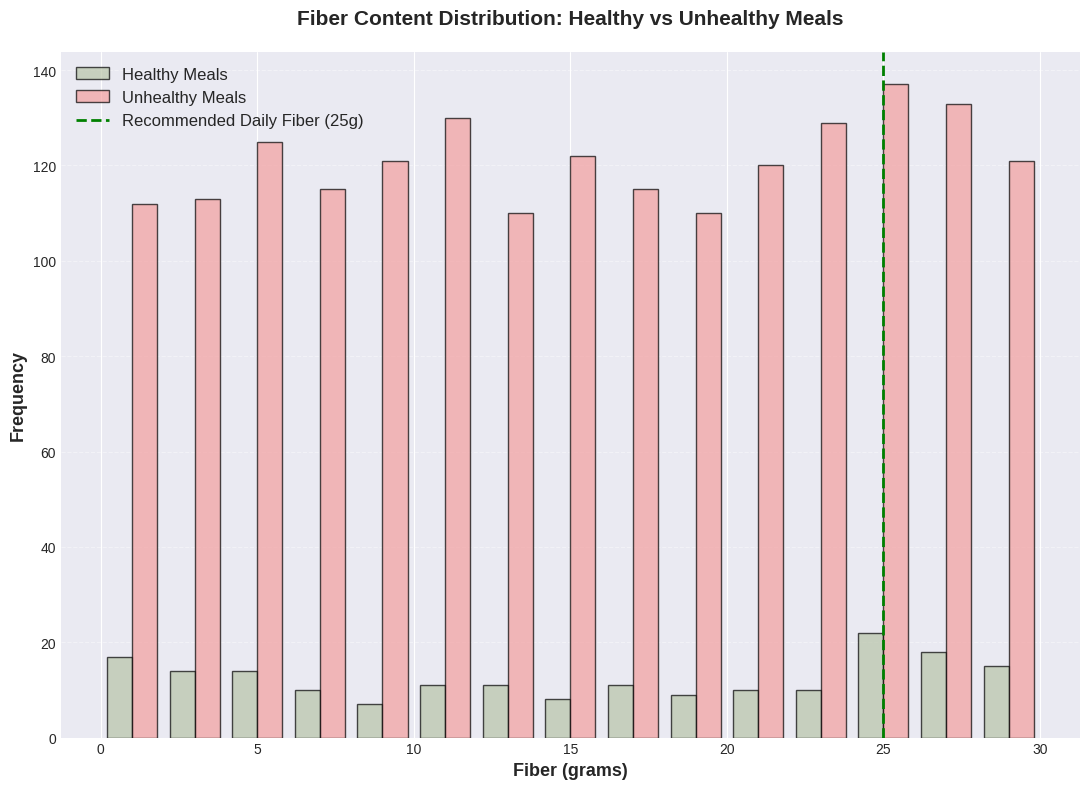

In [87]:
plt.figure(figsize=(11, 8))  # make chart larger for clarity

ax14 = plt.subplot(1, 1, 1)

# Separate fiber data by health category
fiber_healthy = df[df['is_healthy'] == 1]['fiber_g']
fiber_unhealthy = df[df['is_healthy'] == 0]['fiber_g']

# Create overlaid histograms
ax14.hist(
    [fiber_healthy, fiber_unhealthy],
    bins=15,
    label=['Healthy Meals', 'Unhealthy Meals'],
    color=[palette_warm[2], palette_vibrant[1]],
    alpha=0.7,
    edgecolor='black'
)

# Add a reference line for the recommended daily fiber intake
ax14.axvline(
    x=25, color='green', linestyle='--',
    label='Recommended Daily Fiber (25g)', linewidth=2
)

# Labels and title
ax14.set_xlabel('Fiber (grams)', fontsize=13, weight='bold')
ax14.set_ylabel('Frequency', fontsize=13, weight='bold')
ax14.set_title('Fiber Content Distribution: Healthy vs Unhealthy Meals', fontsize=15, weight='bold', pad=20)

# Legend & grid
ax14.legend(fontsize=12)
ax14.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


* Healthy meals generally contain more fiber, as shown by the histogram’s rightward shift compared to unhealthy meals.

* Many unhealthy meals fall below 10g of fiber, whereas healthy meals tend to cluster between 15–30g.

* The recommended daily fiber intake (25g) serves as a useful benchmark - only a portion of healthy meals consistently meet or exceed it.

/tmp/ipython-input-2649690597.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax15.set_xticklabels(sugar_by_meal.index, rotation=35, ha='right', fontsize=11, weight='bold')


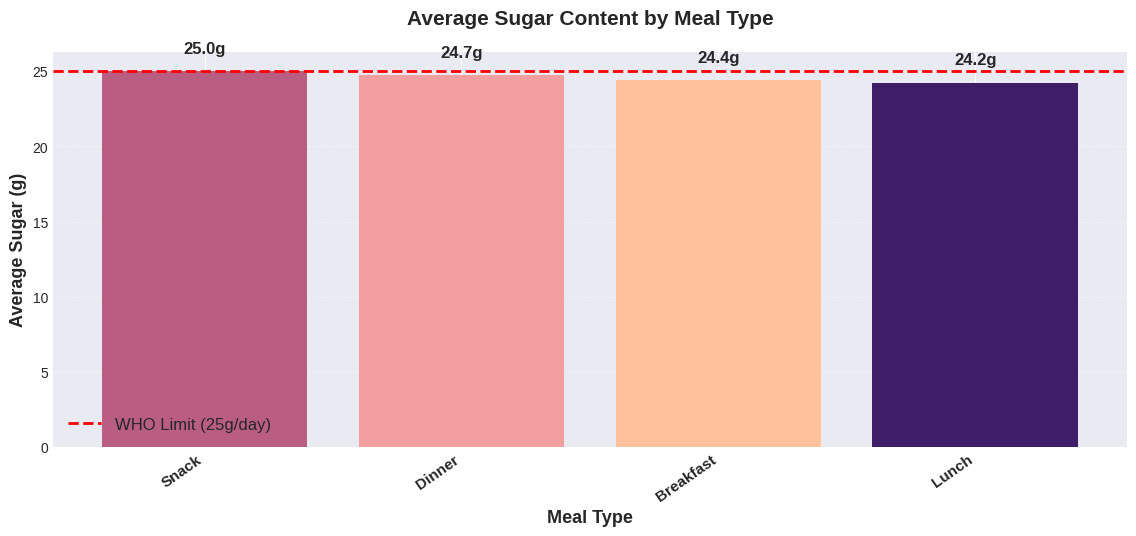

In [89]:
plt.figure(figsize=(12, 6))  # make the chart larger and easier to read

ax15 = plt.subplot(1, 1, 1)

# Calculate average sugar content per meal type
sugar_by_meal = df.groupby('meal_type')['sugar_g'].mean().sort_values(ascending=False)

# Bar chart
ax15.bar(sugar_by_meal.index, sugar_by_meal.values, color=palette_vibrant)

# Add WHO daily sugar recommendation line (25g)
ax15.axhline(y=25, color='red', linestyle='--', linewidth=2, label='WHO Limit (25g/day)')

# Labeling
ax15.set_xlabel('Meal Type', fontsize=13, weight='bold')
ax15.set_ylabel('Average Sugar (g)', fontsize=13, weight='bold')
ax15.set_title('Average Sugar Content by Meal Type', fontsize=15, weight='bold', pad=20)
ax15.set_xticklabels(sugar_by_meal.index, rotation=35, ha='right', fontsize=11, weight='bold')

# Add value labels above bars
for i, v in enumerate(sugar_by_meal.values):
    ax15.text(i, v + 1, f'{v:.1f}g', ha='center', va='bottom', fontsize=12, weight='bold')

# Grid and legend
ax15.grid(axis='y', linestyle='--', alpha=0.4)
ax15.legend(fontsize=12)

plt.tight_layout(pad=3.0)
plt.savefig('/content/drive/MyDrive/data/comprehensive_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


* Main meals and salads tend to stay well below the WHO recommended sugar limit of 25g/day, while snacks and sweets often exceed or approach that limit in just one serving.

* This highlights how meal type strongly influences sugar intake, suggesting that reducing sugar-heavy breakfast or snack options can help improve overall dietary health.

# Summary

In [94]:
from tabulate import tabulate

# Short summary version
diet_summary = [
    ["Keto", "Low-carb, high-fat diet promoting ketosis", "Fat 70–75%, Protein 20–25%, Carbs 5–10%", "Weight loss, metabolism"],
    ["Paleo", "Natural unprocessed foods (hunter-gatherer style)", "Fat 35–45%, Protein 25–35%, Carbs 20–30%", "Digestion, inflammation"],
    ["Vegan", "Plant-based, excludes all animal products", "Carbs 50–60%, Protein 15–20%, Fat 20–30%", "Heart health, sustainability"],
    ["Mediterranean", "Inspired by Mediterranean countries’ habits", "Carbs 40–50%, Protein 15–20%, Fat 30–40%", "Heart health, longevity"],
    ["Vegetarian", "Plant-based with dairy & eggs allowed", "Carbs 50%, Protein 20%, Fat 30%", "Balanced diet, ethics"]
]

headers = ["Diet Type", "Description", "Macro Target", "Best For"]

print(tabulate(diet_summary, headers=headers, tablefmt="grid"))


+---------------+---------------------------------------------------+------------------------------------------+------------------------------+
| Diet Type     | Description                                       | Macro Target                             | Best For                     |
+===============+===================================================+==========================================+==============================+
| Keto          | Low-carb, high-fat diet promoting ketosis         | Fat 70–75%, Protein 20–25%, Carbs 5–10%  | Weight loss, metabolism      |
+---------------+---------------------------------------------------+------------------------------------------+------------------------------+
| Paleo         | Natural unprocessed foods (hunter-gatherer style) | Fat 35–45%, Protein 25–35%, Carbs 20–30% | Digestion, inflammation      |
+---------------+---------------------------------------------------+------------------------------------------+------------------------

In [95]:
diets = {
    "Keto": "Low-carb, high-fat (Best for weight loss)",
    "Paleo": "Whole foods, no grains (Best for digestion)",
    "Vegan": "Plant-based only (Best for heart health)",
    "Mediterranean": "Balanced with olive oil & fish (Heart & longevity)",
    "Vegetarian": "No meat, includes eggs/dairy (Balanced ethics)"
}

for k, v in diets.items():
    print(f"{k:<15}: {v}")

Keto           : Low-carb, high-fat (Best for weight loss)
Paleo          : Whole foods, no grains (Best for digestion)
Vegan          : Plant-based only (Best for heart health)
Mediterranean  : Balanced with olive oil & fish (Heart & longevity)
Vegetarian     : No meat, includes eggs/dairy (Balanced ethics)
